<a href="https://colab.research.google.com/github/Naiomeap/Naiome-Alves-Pereira/blob/main/Trabalho_individual_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Dicionário de Dados

Assist_Soc - Assistente Sociais

Psic - Psicólogo

Psiqui - Psiquiatra

Acoes_prom - Ações de Promoções e Prevenções a saúde

Acoes_comp - Ações Complementares de atenção a saúde

Ar_Ter_km2 - Área Territorial

Pop_Est - Estimativa da População

IDH - Índice de Desenvolvimento Humano

PIB - Produto Interno Bruto Per Capita


## Pré processamento referente aos dados de Ocupação de Nível Superior




In [21]:
# A função de pd.read faz com que a tabela vire um data frame do python, e nesse caso usei um arquivo csv e por isso a função utilizada 
# pd.read_csv 
df1=pd.read_csv('/content/11_Ocupacoes_NivelSuperior.csv')
df1

,Município,Assistente Social,Enfermeiro,Fisioterapeuta,Fonoaudiólogo,Nutricionista,Odontólogo,Psicólogo,Psiquiatra,Total
0,110001 Alta Floresta D'Oeste,4.0,20.0,3.0,0.0,3.0,7.0,1.0,1.0,39.0
1,110037 Alto Alegre dos Parecis,1.0,9.0,3.0,1.0,1.0,2.0,1.0,1.0,19.0
2,110040 Alto Paraíso,0.0,5.0,4.0,0.0,1.0,1.0,2.0,0.0,13.0
3,110034 Alvorada D'Oeste,2.0,12.0,3.0,0.0,0.0,5.0,1.0,0.0,23.0
4,110002 Ariquemes,7.0,112.0,50.0,5.0,8.0,12.0,25.0,1.0,220.0
...,...,...,...,...,...,...,...,...,...,...
5566,522205 Vicentinópolis,0.0,5.0,4.0,0.0,0.0,1.0,1.0,0.0,11.0
5567,522220 Vila Boa,1.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,7.0
5568,522230 Vila Propício,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0
5569,530010 Brasília,546.0,6606.0,2440.0,488.0,1107.0,1115.0,1732.0,249.0,14283.0


A partir de todos os municipios eu selecionei apenas os do Paraná, pois foi a minha escolha de localidade. 
Os municípios do Paraná começam com o número 41, pois é 4º região e o 1º estado.

In [22]:
#Seleção de municipios do paraná (41), usei a função starswith porque a coluna tem um d-type object.
pr1=df1[df1['Município'].str.startswith('41')]
pr1

,Município,Assistente Social,Enfermeiro,Fisioterapeuta,Fonoaudiólogo,Nutricionista,Odontólogo,Psicólogo,Psiquiatra,Total
3912,410010 Abatiá,2.0,5.0,4.0,1.0,0.0,1.0,3.0,0.0,16.0
3913,410020 Adrianópolis,1.0,3.0,2.0,1.0,0.0,2.0,1.0,1.0,11.0
3914,410030 Agudos do Sul,1.0,7.0,2.0,3.0,2.0,1.0,3.0,1.0,20.0
3915,410040 Almirante Tamandaré,6.0,44.0,12.0,3.0,4.0,20.0,16.0,2.0,107.0
3916,410045 Altamira do Paraná,0.0,6.0,1.0,0.0,2.0,0.0,1.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...
4306,412860 Verê,0.0,8.0,4.0,1.0,0.0,8.0,3.0,0.0,24.0
4307,412865 Virmond,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,7.0
4308,412870 Vitorino,1.0,4.0,2.0,0.0,1.0,3.0,3.0,0.0,14.0
4309,412850 Wenceslau Braz,3.0,9.0,5.0,2.0,2.0,7.0,5.0,0.0,33.0


Como o foco desse trabalho é a saúde mental, usarei apenas as colunas referentes as profissões de assistente social, psicólogo e psiquiatra.


---



In [23]:
pr1=pr1.drop(['Enfermeiro', 'Fisioterapeuta',	'Fonoaudiólogo', 'Nutricionista',	'Odontólogo','Total'], axis=1)

## Pré processamento da tabela referente a Copilado Dados da Saúde de 2021

In [24]:
df2=pd.read_csv('/content/2_Compilado_Dados_Saude_2021_novo.csv')
df2

,Município,POSTO DE SAUDE,CENTRO DE SAUDE/UNIDADE BASICA,POLICLINICA,HOSPITAL GERAL,HOSPITAL ESPECIALIZADO,PRONTO SOCORRO GERAL,PRONTO SOCORRO ESPECIALIZADO,Precedimentos com finalidade diagnóstica,Procedimentos Cirúrgicos,Procedimentos Clinicos,Ações de promoção e prevenção em saúde,Ações complementares de atenção a saude
0,110001 Alta Floresta D'Oeste,6,4,0,2,0,0,0,0,96,1289,4316,55066
1,110037 Alto Alegre dos Parecis,0,6,0,1,0,0,0,0,0,566,1247,0
2,110040 Alto Paraíso,2,4,0,1,0,0,0,0,0,262,43604,1201
3,110034 Alvorada D'Oeste,0,7,0,0,0,0,0,0,112,446,2038,0
4,110002 Ariquemes,0,13,1,10,1,0,0,0,1334,6241,4630,56832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,522205 Vicentinópolis,0,5,0,1,0,0,0,0,68,177,7451,0
5567,522220 Vila Boa,0,2,0,1,0,0,0,0,0,0,424,0
5568,522230 Vila Propício,0,2,0,0,0,0,0,0,0,0,28126,0
5569,530010 Brasília,2,178,581,47,22,0,1,458,71614,157243,277529,2063


In [25]:
# o data frame precisa ser chamado e depois especificar a coluna e chamar o data frame para aparecer
pr2=df2[df2['Município'].str.startswith('41')]
pr2

,Município,POSTO DE SAUDE,CENTRO DE SAUDE/UNIDADE BASICA,POLICLINICA,HOSPITAL GERAL,HOSPITAL ESPECIALIZADO,PRONTO SOCORRO GERAL,PRONTO SOCORRO ESPECIALIZADO,Precedimentos com finalidade diagnóstica,Procedimentos Cirúrgicos,Procedimentos Clinicos,Ações de promoção e prevenção em saúde,Ações complementares de atenção a saude
3912,410010 Abatiá,0,3,0,0,0,0,0,0,0,0,12913,0
3913,410020 Adrianópolis,2,1,0,0,0,0,0,0,0,0,561,0
3914,410030 Agudos do Sul,0,3,0,0,0,0,0,0,0,0,1846,0
3915,410040 Almirante Tamandaré,0,15,5,0,0,0,0,0,0,0,1452,0
3916,410045 Altamira do Paraná,0,1,0,1,0,0,0,0,39,218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,412860 Verê,3,1,0,1,0,0,0,0,0,406,31102,0
4307,412865 Virmond,0,2,0,0,0,0,0,0,0,0,43813,0
4308,412870 Vitorino,0,2,0,0,0,0,0,0,0,0,993,0
4309,412850 Wenceslau Braz,0,8,1,1,0,0,0,0,0,434,45425,0


In [26]:
pr2=pr2.drop(['Município', 'POSTO DE SAUDE', 'CENTRO DE SAUDE/UNIDADE BASICA',
       'POLICLINICA', 'HOSPITAL GERAL', 'HOSPITAL ESPECIALIZADO',
       'PRONTO SOCORRO GERAL', 'PRONTO SOCORRO ESPECIALIZADO',
       'Precedimentos com finalidade diagnóstica', 'Procedimentos Cirúrgicos',
       'Procedimentos Clinicos'], axis=1)

## Pré processamento da tabela referente a Ações Complementares da  atenção a saúde.

In [27]:
df3=pd.read_csv('/content/3_Acoes_complementares_da_atencao_a_saude.csv')
df3

,Município,2017,2018,2019,2020,2021,Total
0,110001 Alta Floresta D'Oeste,0,0,7050,33908,55066,96024
1,110037 Alto Alegre dos Parecis,0,0,0,0,0,0
2,110040 Alto Paraíso,0,0,551,1222,1201,2974
3,110034 Alvorada D'Oeste,0,0,0,0,0,0
4,110002 Ariquemes,2031,12647,56519,34655,56832,162684
...,...,...,...,...,...,...,...
5566,522205 Vicentinópolis,0,0,0,0,0,0
5567,522220 Vila Boa,0,0,0,0,0,0
5568,522230 Vila Propício,17,0,0,0,0,17
5569,530010 Brasília,53569,25892,45759,15613,2063,142896


In [28]:
pr3=df3[df3['Município'].str.startswith('41')]
pr3

,Município,2017,2018,2019,2020,2021,Total
3912,410010 Abatiá,0,0,0,0,0,0
3913,410020 Adrianópolis,78,50,0,0,0,128
3914,410030 Agudos do Sul,0,0,0,0,0,0
3915,410040 Almirante Tamandaré,890,711,0,0,0,1601
3916,410045 Altamira do Paraná,0,0,0,0,0,0
...,...,...,...,...,...,...,...
4306,412860 Verê,105,79,0,0,0,184
4307,412865 Virmond,73,61,0,0,0,134
4308,412870 Vitorino,0,0,0,0,0,0
4309,412850 Wenceslau Braz,150,119,0,0,0,269


In [29]:
pr3.columns

Index(['Município', '2017', '2018', '2019', '2020', '2021', 'Total'], dtype='object')

In [30]:
pr3=pr3.drop(['Município', 'Total'], axis=1)

Foi realizada a junção das 3 tabelas (ocupação nivel superior, copilados dados de saúde 2021 e ações complementares da atenção a saúde) tornando um único data frame, no qual as linhas são os municipios e cada coluna veio de diferentes data frame.

```
```



In [31]:
pr=pd.concat([pr1, pr2, pr3], axis=1, join='inner')
pr

,Município,Assistente Social,Psicólogo,Psiquiatra,Ações de promoção e prevenção em saúde,Ações complementares de atenção a saude,2017,2018,2019,2020,2021
3912,410010 Abatiá,2.0,3.0,0.0,12913,0,0,0,0,0,0
3913,410020 Adrianópolis,1.0,1.0,1.0,561,0,78,50,0,0,0
3914,410030 Agudos do Sul,1.0,3.0,1.0,1846,0,0,0,0,0,0
3915,410040 Almirante Tamandaré,6.0,16.0,2.0,1452,0,890,711,0,0,0
3916,410045 Altamira do Paraná,0.0,1.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4306,412860 Verê,0.0,3.0,0.0,31102,0,105,79,0,0,0
4307,412865 Virmond,2.0,1.0,0.0,43813,0,73,61,0,0,0
4308,412870 Vitorino,1.0,3.0,0.0,993,0,0,0,0,0,0
4309,412850 Wenceslau Braz,3.0,5.0,0.0,45425,0,150,119,0,0,0


In [32]:
df4=pd.read_csv('/content/DF2.csv', sep=';' )
df4

,Column1,AR_TER_km2,POP_EST,IDHM,PIB_P_CAP,CD_MUN
0,3912,2287170,73600,6870,2152976,4100103
1,3913,1349311,57970,6670,4367747,4100202
2,3914,1922610,95670,66,2208781,4100301
3,3915,1948880,1214200,6990,1316804,4100400
4,3916,3869450,14290,6670,3320641,4100459
...,...,...,...,...,...,...
394,4306,9677720,26300,6780,3443222,4128625
395,4307,7774820,55250,5460,1111158,4128633
396,4308,2431730,40510,7220,3173081,4128658
397,4309,3082180,68790,7020,5287669,4128708


In [33]:
pr.to_csv('Saude_Mental_PR.csv', index=False)

## Análise Exploratória e Descritiva

In [34]:
df=pd.read_csv('/content/Tabela_dados.csv', sep=';', encoding='latin-1')
df

,Município,Assist_Soc,Psic,Psiqui,Acoes_prom,Acoes_comp,2017,2018,2019,2020,2021,Ar_Ter_km2,Pop_Est,PIB,IDH
0,410640 Cornélio Procópio,13.0,50.0,3.0,3149,0,241,163,0,0,0,1562848,75380,2620569,6.00
1,411007 Imbaú,2.0,2.0,0.0,0,0,53,2,0,0,0,9362080,111170,1718647,6.00
2,410300 Boa Esperança,0.0,2.0,0.0,10671,0,20,14,0,0,0,1517970,24370,3693139,7.00
3,411270 Jataizinho,2.0,2.0,0.0,1122,0,25,0,0,0,0,2891730,121080,4976988,7.00
4,411880 Peabiru,2.0,3.0,0.0,1003,0,90,0,0,0,0,2406350,114060,3039907,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,410470 Carlópolis,2.0,5.0,0.0,0,0,0,0,0,0,0,2101074,3360730,3773302,7.82
395,411840 Paranavaí,15.0,39.0,5.0,11877,0,439,162,0,0,0,5390870,847790,468425,7.82
396,412070 Quatiguá,0.0,2.0,0.0,0,0,31,0,0,0,0,1143930,40430,4428378,7.91
397,411500 Marilena,2.0,2.0,0.0,4032,0,0,0,0,0,0,4870120,4364720,4444252,8.08


In [35]:
df['IDH']= df['IDH'].astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Município   399 non-null    object 
 1   Assist_Soc  399 non-null    float64
 2   Psic        399 non-null    float64
 3   Psiqui      399 non-null    float64
 4   Acoes_prom  399 non-null    int64  
 5   Acoes_comp  399 non-null    int64  
 6   2017        399 non-null    int64  
 7   2018        399 non-null    int64  
 8   2019        399 non-null    int64  
 9   2020        399 non-null    int64  
 10  2021        399 non-null    int64  
 11  Ar_Ter_km2  399 non-null    int64  
 12  Pop_Est     399 non-null    int64  
 13  PIB         399 non-null    int64  
 14  IDH         399 non-null    float64
dtypes: float64(4), int64(10), object(1)
memory usage: 46.9+ KB


O data frame é composto por 15 variavéis distribuidas em 399 entradas. Os dados não apresentam nenhum dado nulo, e todas as colunas de números estão como números, sendo a única coluna de string a coluna dos municípios

In [37]:
df.describe()

,Assist_Soc,Psic,Psiqui,Acoes_prom,Acoes_comp,2017,2018,2019,2020,2021,Ar_Ter_km2,Pop_Est,PIB,IDH
count,399.000000,399.000000,399.000000,3.990000e+02,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,3.990000e+02,3.990000e+02,3.990000e+02,399.000000
mean,4.621554,13.726817,1.283208,3.643205e+04,1793.268170,1552.897243,1404.025063,1899.791980,1202.604010,1793.268170,3.245054e+06,2.906638e+05,3.015829e+06,7.019599
std,18.487117,81.257349,11.275780,1.024804e+05,12127.366973,7471.306113,7347.261048,12035.258364,7585.025909,12127.366973,2.415299e+06,1.113651e+06,1.623032e+06,0.385659
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.356000e+03,1.309000e+04,1.734310e+05,5.460000
25%,1.000000,2.000000,0.000000,6.220000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.513673e+06,4.907500e+04,2.160610e+06,6.810000
50%,2.000000,3.000000,0.000000,7.870000e+03,0.000000,26.000000,4.000000,0.000000,0.000000,0.000000,2.693890e+06,9.573000e+04,2.740942e+06,7.060000
75%,3.000000,6.000000,0.000000,3.132900e+04,0.000000,112.000000,68.000000,0.000000,0.000000,0.000000,4.448420e+06,1.900050e+05,3.633312e+06,7.250000
max,291.000000,1500.000000,217.000000,1.062368e+06,173492.000000,84172.000000,97951.000000,154354.000000,112072.000000,173492.000000,9.995170e+06,1.963726e+07,1.452663e+07,8.230000


A média de psicologos nas cidades do estado do Paraná é de 13, porém o desvio padrão é de 81,26, sendo a quantidade maxima de profissionais no estado é de 1500. Em contra partida o número de psiquiatras é em média 1,28, com desvio padrão 11,27 e a quantidade máxima de profissionais é 217. 

In [38]:
cols=['Assist_Soc',	'Psic',	'Psiqui',	'Acoes_prom',	'Acoes_comp', 'Ar_Ter_km2',	'Pop_Est',	'IDH',	'PIB']

In [39]:
df[cols].head()

,Assist_Soc,Psic,Psiqui,Acoes_prom,Acoes_comp,Ar_Ter_km2,Pop_Est,IDH,PIB
0,13.0,50.0,3.0,3149,0,1562848,75380,6.0,2620569
1,2.0,2.0,0.0,0,0,9362080,111170,6.0,1718647
2,0.0,2.0,0.0,10671,0,1517970,24370,7.0,3693139
3,2.0,2.0,0.0,1122,0,2891730,121080,7.0,4976988
4,2.0,3.0,0.0,1003,0,2406350,114060,7.0,3039907


In [40]:
df[cols].corr()

,Assist_Soc,Psic,Psiqui,Acoes_prom,Acoes_comp,Ar_Ter_km2,Pop_Est,IDH,PIB
Assist_Soc,1.000000,0.935230,0.900778,0.491741,0.056247,0.013122,-0.003188,-0.012454,-0.016090
Psic,0.935230,1.000000,0.984891,0.430096,0.073957,0.026249,-0.007328,-0.036404,-0.032006
Psiqui,0.900778,0.984891,1.000000,0.407799,0.028237,0.043003,-0.005520,-0.036062,-0.030005
Acoes_prom,0.491741,0.430096,0.407799,1.000000,0.057980,-0.001946,0.003025,0.051574,0.079555
Acoes_comp,0.056247,0.073957,0.028237,0.057980,1.000000,0.034653,-0.013172,-0.085335,-0.052928
Ar_Ter_km2,0.013122,0.026249,0.043003,-0.001946,0.034653,1.000000,0.060333,-0.079509,0.003318
Pop_Est,-0.003188,-0.007328,-0.005520,0.003025,-0.013172,0.060333,1.000000,0.306001,0.120094
IDH,-0.012454,-0.036404,-0.036062,0.051574,-0.085335,-0.079509,0.306001,1.000000,0.311994
PIB,-0.016090,-0.032006,-0.030005,0.079555,-0.052928,0.003318,0.120094,0.311994,1.000000


## Gráfico de correlação de Pearson

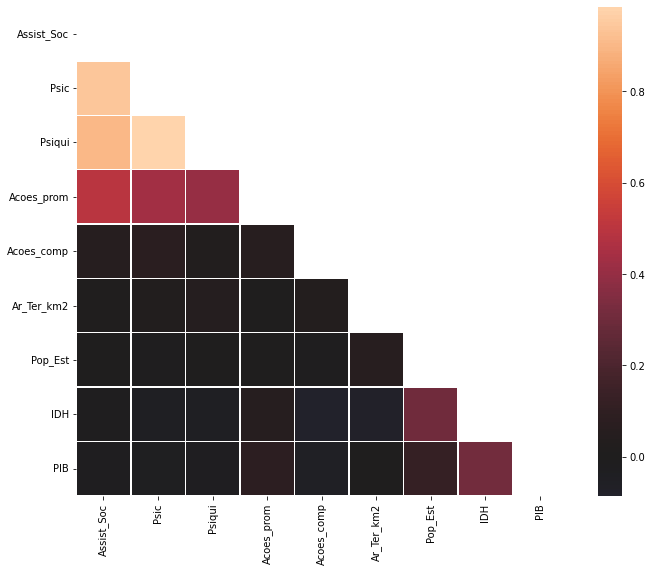

In [41]:
corr = df[cols].corr()
mask = np.triu(np.ones_like(corr, dtype= bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask= mask, center= 0, linewidth= 0.5);

A coluna dos assistentes sociais se correlaciona bastante com psicólogos, um pouco menos com psiquiatras e média correlação com ações de promoção a saúde. E a linha de Assistentes sociais se correlaciona bastante com psicologos, um pouco a menos com psiquiatras e média correlação com ações promocionais.
Nesse momento não foi correlacionado as colunas de 2017, 2018, 2019, 2020 e 2021, pois esses dados é referente a quantidade de ações complementares a saúde em cada cidade, e ela será usada no machine learning para conseguir achar um padrão.

## Plot



In [42]:
df['Psic']

0      50.0
1       2.0
2       2.0
3       2.0
4       3.0
       ... 
394     5.0
395    39.0
396     2.0
397     2.0
398     2.0
Name: Psic, Length: 399, dtype: float64

In [43]:
df['Psic'] = pd.cut(df['Psic'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 250, 500, 1000, 1500])

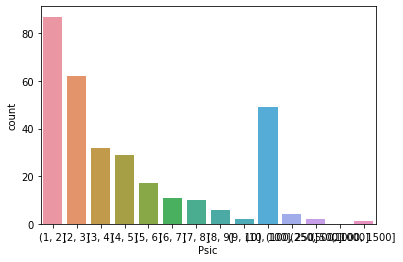

In [44]:
sns.countplot(data=df,x='Psic');

In [45]:
df['Assist_Soc']

0      13.0
1       2.0
2       0.0
3       2.0
4       2.0
       ... 
394     2.0
395    15.0
396     0.0
397     2.0
398     1.0
Name: Assist_Soc, Length: 399, dtype: float64

In [46]:
df['Assist_Soc'] = pd.cut(df['Assist_Soc'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 250, 300])

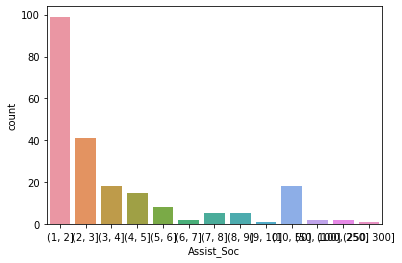

In [47]:
sns.countplot(data=df,x='Assist_Soc')

In [48]:
df['Psiqui']

0      3.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
394    0.0
395    5.0
396    0.0
397    0.0
398    0.0
Name: Psiqui, Length: 399, dtype: float64

In [49]:
df['Psiqui'] = pd.cut(df['Psiqui'], bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 200, 250])

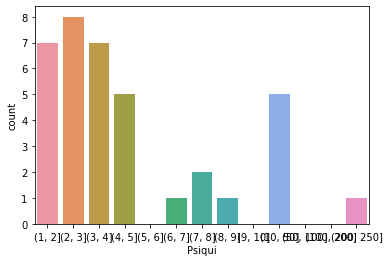

In [50]:
sns.countplot(data=df,x='Psiqui');

In [51]:
df['Acoes_prom']

0       3149
1          0
2      10671
3       1122
4       1003
       ...  
394        0
395    11877
396        0
397     4032
398        0
Name: Acoes_prom, Length: 399, dtype: int64

In [52]:
df['Acoes_prom'] = pd.cut(df['Acoes_prom'], bins=[1500, 3000, 5000, 10000, 50000, 100000, 200000, 5000000])

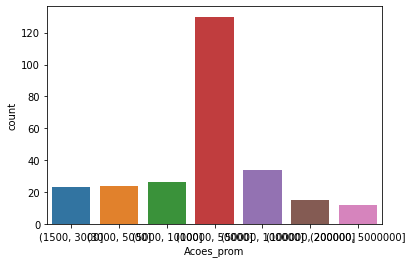

In [53]:
sns.countplot(data=df,x='Acoes_prom');

In [54]:
df['Acoes_comp']

0      0
1      0
2      0
3      0
4      0
      ..
394    0
395    0
396    0
397    0
398    0
Name: Acoes_comp, Length: 399, dtype: int64

In [55]:
df['Acoes_comp'] = pd.cut(df['Acoes_comp'], bins=[1500, 3000, 5000, 10000, 50000, 100000, 250000])

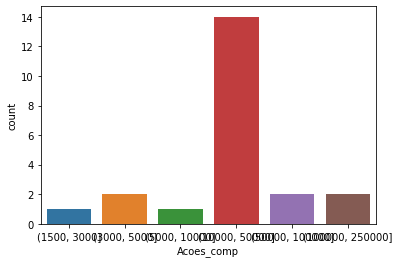

In [56]:
sns.countplot(data=df,x='Acoes_comp')

In [57]:
df['Ar_Ter_km2']

0      1562848
1      9362080
2      1517970
3      2891730
4      2406350
        ...   
394    2101074
395    5390870
396    1143930
397    4870120
398    4348920
Name: Ar_Ter_km2, Length: 399, dtype: int64

In [58]:
df['Ar_Ter_km2'] = pd.cut(df['Ar_Ter_km2'], bins=[170000,500000, 750000, 1000000, 1550000])

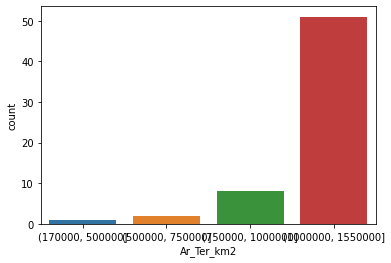

In [59]:
sns.countplot(data=df,x='Ar_Ter_km2')

In [60]:
df['Pop_Est']

0         75380
1        111170
2         24370
3        121080
4        114060
         ...   
394     3360730
395      847790
396       40430
397     4364720
398    19637260
Name: Pop_Est, Length: 399, dtype: int64

In [61]:
df['Pop_Est'] = pd.cut(df['Pop_Est'], bins=[10000,50000,100000,200000,500000,1500000])

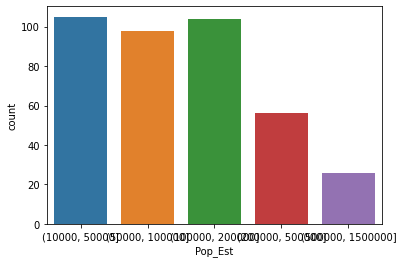

In [62]:
sns.countplot(data=df ,  x= 'Pop_Est');

In [63]:
df['IDH']

0      6.00
1      6.00
2      7.00
3      7.00
4      7.00
       ... 
394    7.82
395    7.82
396    7.91
397    8.08
398    8.23
Name: IDH, Length: 399, dtype: float64

In [65]:
df['IDH'] = pd.cut(df['IDH'], bins=[0, 3.5, 5.5, 7, 8, 10 ])

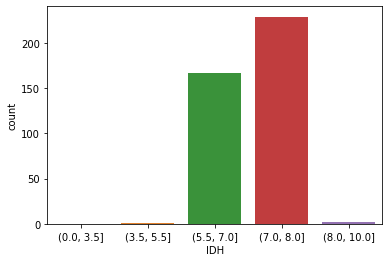

In [66]:
sns.countplot(data=df,x='IDH')

O intervalo do indice de IDH foi feito em relação de como o indice é calculado e caracterizaado, sendo de 0,350 – 0,554 (baixo), 0,555 – 0,699 (médio), 0,700 – 0,799 (alto) e 0,800 – 1,000 (muito alto).

In [67]:
df['PIB']

0      2620569
1      1718647
2      3693139
3      4976988
4      3039907
        ...   
394    3773302
395     468425
396    4428378
397    4444252
398    4545829
Name: PIB, Length: 399, dtype: int64

In [68]:
df['PIB'] = pd.cut(df['PIB'], bins=[170000, 300000, 500000, 750000, 1000000, 1550000])

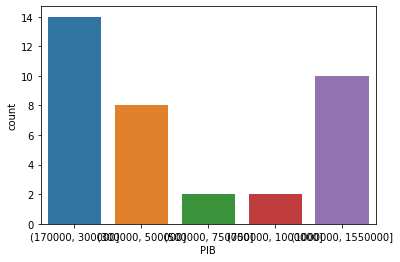

In [69]:
sns.countplot(data=df,x='PIB')